# Carga Datos y librerias

In [1]:

#------------Montar el Drive y acceder a la API con la key -------------

import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
with open("/content/drive/MyDrive/Data Proyects/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d teejmahal20/airline-passenger-satisfaction



  0% 0.00/2.71M [00:00<?, ?B/s]
100% 2.71M/2.71M [00:00<00:00, 168MB/s]


In [3]:
import zipfile

import os



os.listdir()



for file in os.listdir():

    if file.endswith('.zip'):

      zip_ref = zipfile.ZipFile(file, 'r')

      zip_ref.extractall()

      zip_ref.close()

In [4]:
import pickle
from tempfile import mkdtemp
from shutil import rmtree

%pip install feature_engine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import set_config
from sklearn.base import clone
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from feature_engine.preprocessing import MatchVariables
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder, OneHotEncoder
from feature_engine.imputation import (
    AddMissingIndicator, MeanMedianImputer, CategoricalImputer, EndTailImputer
)
from feature_engine.transformation import PowerTransformer
from feature_engine.creation import RelativeFeatures
from feature_engine.selection import DropFeatures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.0 MB/s eta 0:00:00


# Metadata:

-Gender: Gender of the passengers (Female, Male)

-Customer Type: The customer type (Loyal customer, disloyal customer)

-Age: The actual age of the passengers

-Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

-Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

-Flight distance: The flight distance of this journey

-Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

-Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

-Ease of Online booking: Satisfaction level of online booking

-Gate location: Satisfaction level of Gate location

-Food and drink: Satisfaction level of Food and drink

-Online boarding: Satisfaction level of online boarding

-Seat comfort: Satisfaction level of Seat comfort

-Inflight entertainment: Satisfaction level of inflight entertainment

-On-board service: Satisfaction level of On-board service

-Leg room service: Satisfaction level of Leg room service

-Baggage handling: Satisfaction level of baggage handling

-Check-in service: Satisfaction level of Check-in service

-Inflight service: Satisfaction level of inflight service

-Cleanliness: Satisfaction level of Cleanliness

-Departure Delay in Minutes: Minutes delayed when departure

-Arrival Delay in Minutes: Minutes delayed when Arrival

-Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# EDA


Una gran parte del EDA tambien fue hecho con sweetviz, el codigo fue ejectuado localmente pero los archivos seran enviados y el codigo estará como comentado.

In [ ]:
# %pip install sweetviz

In [ ]:
#import sweetviz as sv

#report = sv.analyze(df)

# Guardar el informe en un archivo HTML
#report.show_html("reporte_datos.html")

In [5]:
df = pd.read_csv('train.csv')
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

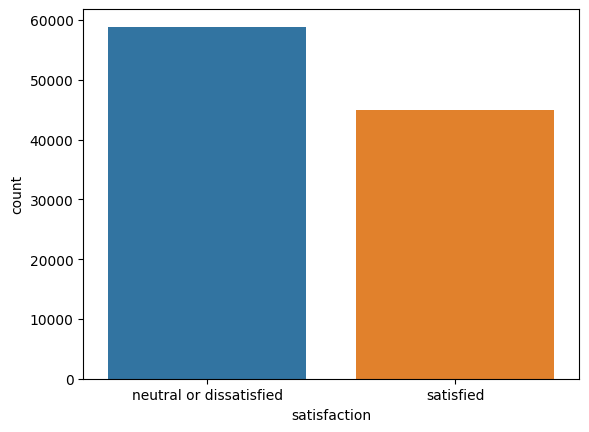

In [6]:
import seaborn as sns

sns.countplot(x = 'satisfaction', data = df)

<Axes: xlabel='Gender', ylabel='count'>

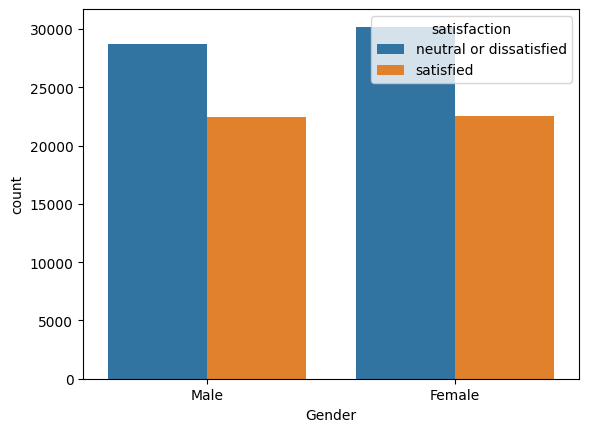

In [ ]:
import seaborn as sns

sns.countplot(x = 'Gender', data = df, hue = 'satisfaction')

Chequeo que las clases no esten desbalanceadas

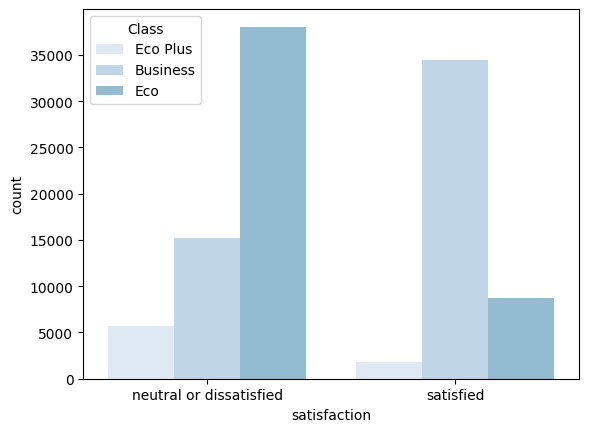

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


blue_palette = sns.color_palette("Blues")
sns.countplot(x='satisfaction', data=df, hue='Class', palette=blue_palette)
plt.show()


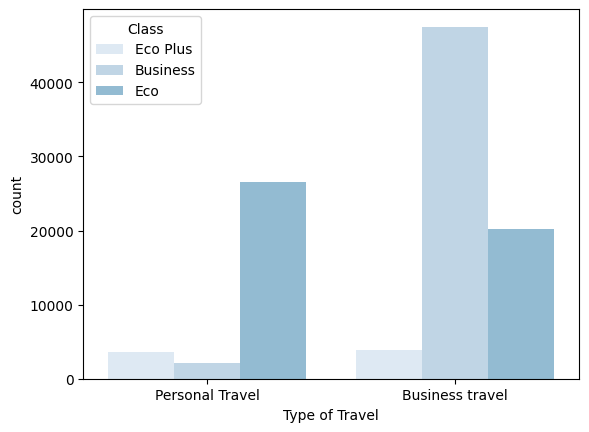

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

blue_palette = sns.color_palette("Blues")
sns.countplot(x='Type of Travel', data=df, hue='Class', palette=blue_palette)
plt.show()


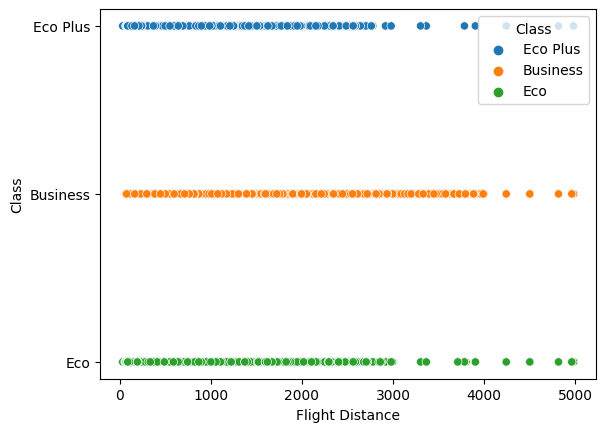

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Flight Distance', y='Class', data=df, hue='Class')
plt.show()


Serie de gráficos para ver si "scores" y la satisfaccion a ver si se ve algún indicio de si alguno tiene un peso importante

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

col_scores = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

# Configurar el tamaño del gráfico
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)  # Ajustar el espacio vertical entre los gráficos

# Iterar sobre las columnas de puntuación
for ax, col in zip(axes.flatten(), col_scores):
    # Crear un gráfico de barras apilado para cada columna de puntuación
    sns.histplot(data=df, x=col, hue='satisfaction', multiple='stack', discrete=True, ax=ax)

    # Ajustar la leyenda y las etiquetas
    ax.set_title(f'Satisfacción para {col}')
    ax.set_xlabel('Valor de Score')
    ax.set_ylabel('Cantidad')

# Ajustar el diseño del gráfico
plt.suptitle('Distribuciones de Satisfacción para Distintos Scores', y=1.02)  # Añadir un título general
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Preprocessing

In [ ]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
for col in df:

  print(df[col].dtypes)

int64
int64
object
object
int64
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
object


In [ ]:
num_var = df.select_dtypes(include=['int', 'float']).columns
cat_var = df.select_dtypes(include=['object']).columns
#print(cat_var)
#print(num_var)
df = df.drop(['Unnamed: 0', 'id'], axis = 1)

In [ ]:
# Imprimir la cantidad de valores únicos para cada variable categórica
for var in cat_var:
    unique_values = df[var].nunique()
    print(f"Variable '{var}' tiene {unique_values} valores únicos.")

Variable 'Gender' tiene 2 valores únicos.
Variable 'Customer Type' tiene 2 valores únicos.
Variable 'Type of Travel' tiene 2 valores únicos.
Variable 'Class' tiene 3 valores únicos.
Variable 'satisfaction' tiene 2 valores únicos.


In [ ]:
print(num_var)

Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


Corregir lo de los nombres no quiero que queden onda binary_encoder__satisfaction_satisfied sino con el nombre original


In [ ]:
#Fillear los na de Arrival Delay in Minutes con la MODA

df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0], inplace=True)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.encoding import CountFrequencyEncoder

#Creo la variable flight status ya que cuando un vuelo se demora mas de 15'se lo considera delayed. 0: on time 1: delayed

# Crear la nueva variable binaria
df['Flight Status'] = (df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']) <= 15
# Convertir True/False a 1/0
df['Flight Status'] = df['Flight Status'].astype(int)


# Definir las columnas que requieren encoding
binary_cols = ['Gender', 'satisfaction']
freq_cols = [col for col in cat_var if col not in binary_cols]
cols_to_scale = ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']



# Crear el transformer para las columnas binarias
binary_transformer = Pipeline(steps=[
    ('mapping', OneHotEncoder(drop='if_binary', sparse=False))
])


#Freq Transformer
frecuency_transformer = CountFrequencyEncoder(encoding_method='frequency')


#Standard Scaler
standard_scaler =StandardScaler()


# Crear el preprocesamiento del DataFrame
preprocessor = ColumnTransformer(
    transformers=[
        ('binary_encoder', binary_transformer, binary_cols),
        ('frecuency_encoder', frecuency_transformer, freq_cols),
        ('standard_scaler',standard_scaler,cols_to_scale)
    ],remainder='passthrough')

#Considerar la idea del parametro de ColumnTransformer --> transformer_weights = dict{transformer_name: transformer_weight}

# Crear el pipeline completo
pipe = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el pipeline al DataFrame
df_transformed = pipe.fit_transform(df)

# Visualizar el DataFrame transformado
print(pd.DataFrame(df_transformed, columns=pipe.named_steps['preprocessor'].get_feature_names_out()))


pd_transformed = pd.DataFrame(df_transformed, columns=pipe.named_steps['preprocessor'].get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        binary_encoder__Gender_Male  binary_encoder__satisfaction_satisfied  \
0                               1.0                                     0.0   
1                               1.0                                     0.0   
2                               0.0                                     1.0   
3                               0.0                                     0.0   
4                               1.0                                     1.0   
...                             ...                                     ...   
103899                          0.0                                     0.0   
103900                          1.0                                     1.0   
103901                          1.0                                     0.0   
103902                          0.0                                     0.0   
103903                          1.0                                     0.0   

        frecuency_encoder__Customer Type  frecuency

# Pruebo modelos básicos


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, recall_score, precision_score

# Asumiendo que ya tienes tu DataFrame df_transformed

# Definir las columnas predictoras (X) y la variable objetivo (y)
X = pd_transformed.drop('binary_encoder__satisfaction_satisfied', axis=1)
y = pd_transformed['binary_encoder__satisfaction_satisfied']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelos
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    #('SVM', SVC(random_state=42)), tardaba demasiado. No vale la pena para un paneo rápido
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

# Probar cada modelo y mostrar su rendimiento
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Medir el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Imprimir resultados
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Balanced Accuracy: {balanced_accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'AUC: {auc:.4f}')
    print('---')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8476
Balanced Accuracy: 0.8424
Precision: 0.8412
Recall: 0.8021
AUC: 0.8424
---
Model: Random Forest
Accuracy: 0.9616
Balanced Accuracy: 0.9590
Precision: 0.9722
Recall: 0.9388
AUC: 0.9590
---
Model: AdaBoost
Accuracy: 0.9268
Balanced Accuracy: 0.9246
Precision: 0.9232
Recall: 0.9077
AUC: 0.9246
---
Model: XGBoost
Accuracy: 0.9631
Balanced Accuracy: 0.9609
Precision: 0.9717
Recall: 0.9430
AUC: 0.9609
---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.

# Optimizo el XGBoost best model


In [ ]:
#%pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Cargar df_val
df_val = pd.read_csv('test.csv')
df_val = df_val.drop('Unnamed: 0', axis=1)
df_val['Arrival Delay in Minutes'].fillna(df_val['Arrival Delay in Minutes'].mode()[0], inplace=True)

# Crear la nueva variable binaria
df_val['Flight Status'] = (df_val['Departure Delay in Minutes'] + df_val['Arrival Delay in Minutes']) <= 15
# Convertir True/False a 1/0
df_val['Flight Status'] = df_val['Flight Status'].astype(int)

# Transformar df_val con el mismo pipeline que se usó para X_train
df_val_transformed = pd.DataFrame(pipe.transform(df_val), columns=pipe.named_steps['preprocessor'].get_feature_names_out())

# Separar las columnas predictoras y la variable objetivo en df_val_transformed
X_val = df_val_transformed.drop('binary_encoder__satisfaction_satisfied', axis=1)
y_val = df_val_transformed['binary_encoder__satisfaction_satisfied']

# Definir el espacio de búsqueda de hiperparámetros para XGBoost
param_space = {
    'classifier__n_estimators': (50, 200),
    'classifier__learning_rate': (0.01, 1.0, 'log-uniform'),
    'classifier__max_depth': (3, 15),
    'classifier__subsample': (0.5, 1.0),
    'classifier__min_child_weight': (1, 10),
}

# Realizar la búsqueda bayesiana de hiperparámetros
bayes_search = BayesSearchCV(XGBClassifier(random_state=42), param_space, n_iter=20, cv=3, scoring='roc_auc', n_jobs=-1)
bayes_search.fit(X, y)

# Obtener el mejor modelo
best_model = bayes_search.best_estimator_



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:32:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "classifier__learning_rate", "classifier__max_depth", "classifier__min_child_weight", "classifier__n_estimators", "classifier__subsample" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.model_selection import cross_val_score

# Obtener los mejores parámetros de la búsqueda bayesiana
best_params = bayes_search.best_params_

# Crear el clasificador XGBoost con los mejores parámetros
best_xgb_model = XGBClassifier(random_state=42, **best_params)

# Realizar validación cruzada con el modelo optimizado
cv_scores = cross_val_score(best_xgb_model, X, y, cv=3, scoring='roc_auc', n_jobs=-1)

# Imprimir los resultados
print("ROC AUC en cada fold de la validación cruzada:")
print(cv_scores)
print(f"Promedio de ROC AUC: {cv_scores.mean():.4f}")


ROC AUC en cada fold de la validación cruzada:
[0.99449181 0.99492829 0.99492101]
Promedio de ROC AUC: 0.9948


In [ ]:
# Obtener los mejores parámetros de la búsqueda bayesiana
best_params = bayes_search.best_params_

# Crear el clasificador XGBoost con los mejores parámetros
best_xgb_model = XGBClassifier(random_state=42, **best_params)

# Ajustar el modelo a los datos de entrenamiento
best_xgb_model.fit(X, y)

# Hacer predicciones en el conjunto de validación con el nuevo modelo
y_pred_val = best_xgb_model.predict(X_val)

# Calcular la métrica en el conjunto de validación
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f'Accuracy en el conjunto de validación: {accuracy_val:.4f}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:37:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "classifier__learning_rate", "classifier__max_depth", "classifier__min_child_weight", "classifier__n_estimators", "classifier__subsample" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy en el conjunto de validación: 0.9641


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hacer predicciones de probabilidad en el conjunto de validación
y_prob_val = best_xgb_model.predict_proba(X_val)[:, 1]

# Convertir las probabilidades a etiquetas binarias usando un umbral
threshold = 0.5
y_pred_val = (y_prob_val > threshold).astype(int)

# Calcular métricas
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_prob_val)

# Imprimir las métricas
print(f'Accuracy en el conjunto de validación: {accuracy:.4f}')
print(f'Precision en el conjunto de validación: {precision:.4f}')
print(f'Recall en el conjunto de validación: {recall:.4f}')
print(f'F1 Score en el conjunto de validación: {f1:.4f}')
print(f'AUC-ROC en el conjunto de validación: {roc_auc:.4f}')

Accuracy en el conjunto de validación: 0.9641
Precision en el conjunto de validación: 0.9721
Recall en el conjunto de validación: 0.9453
F1 Score en el conjunto de validación: 0.9585
AUC-ROC en el conjunto de validación: 0.9951


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[14264   309]
 [  624 10779]]


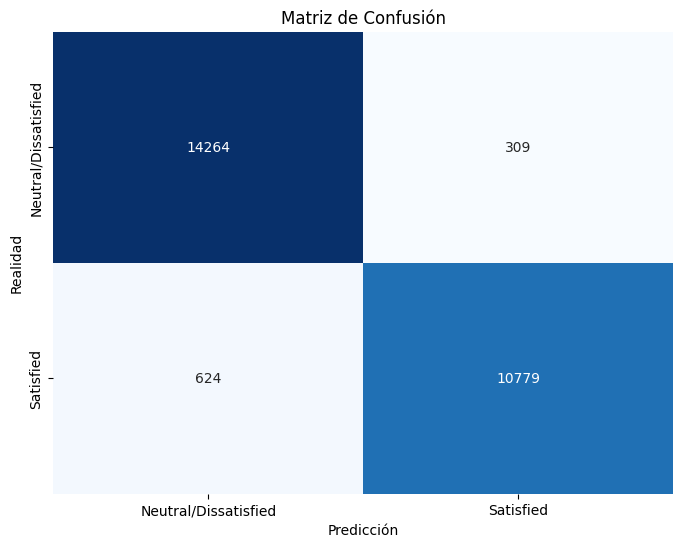

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral/Dissatisfied', 'Satisfied'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')


Precisión: 0.9721
Sensibilidad (Recall): 0.9453
Puntuación F1: 0.9585


AUC-ROC: 0.9951
AUC: 0.9620


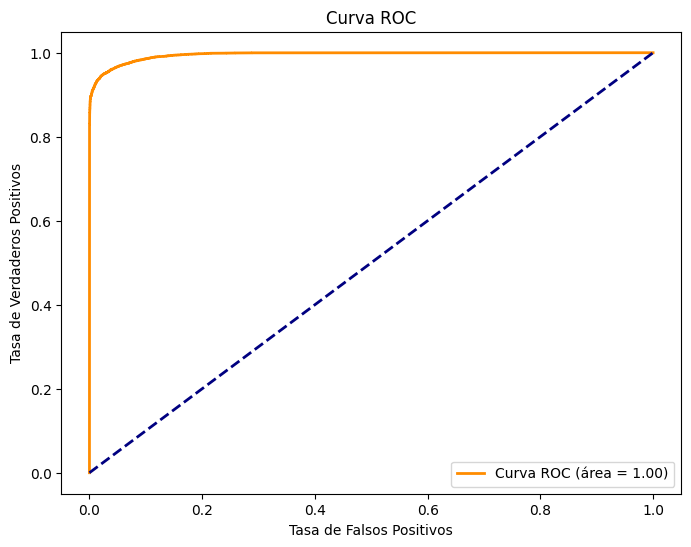

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_val, best_xgb_model.predict_proba(X_val)[:, 1])
auc = roc_auc_score(y_val, y_pred_val)

print(f'AUC-ROC: {roc_auc:.4f}')
print(f'AUC: {auc:.4f}')

# Curva ROC
fpr, tpr, _ = roc_curve(y_val, best_xgb_model.predict_proba(X_val)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


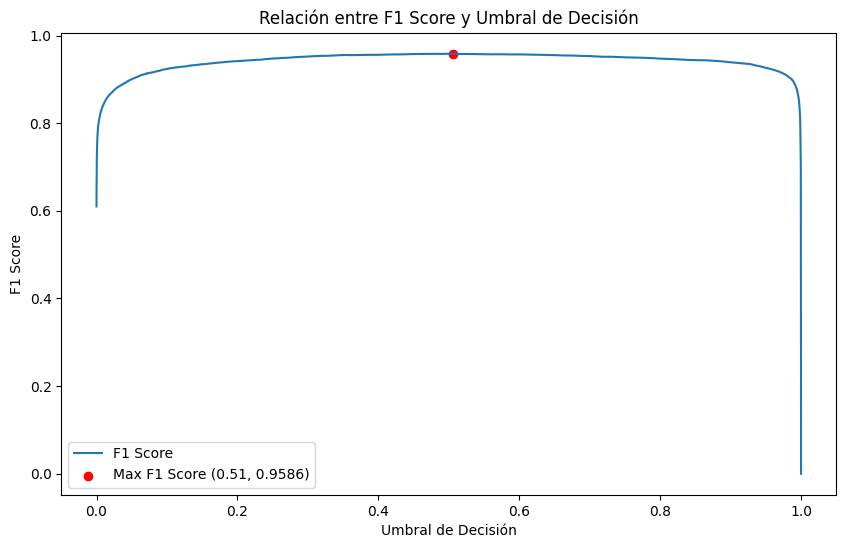

Umbral Óptimo: 0.51
Max F1 Score: 0.9586


In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas por el modelo en el conjunto de validación
y_prob_val = best_xgb_model.predict_proba(X_val)[:, 1]

# Calcular la curva de precisión y recuperación (precision-recall curve)
precision, recall, thresholds = precision_recall_curve(y_val, y_prob_val)

# Calcular el F1 score para diferentes umbrales
f1_scores = [f1_score(y_val, y_prob_val > threshold) for threshold in thresholds]

# Encontrar el umbral que maximiza el F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]
max_f1_score = max(f1_scores)

# Visualizar la relación entre el F1 score y el umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.scatter(optimal_threshold, max_f1_score, color='red', marker='o', label=f'Max F1 Score ({optimal_threshold:.2f}, {max_f1_score:.4f})')
plt.xlabel('Umbral de Decisión')
plt.ylabel('F1 Score')
plt.title('Relación entre F1 Score y Umbral de Decisión')
plt.legend()
plt.show()

# Imprimir el umbral óptimo y el F1 score correspondiente
print(f'Umbral Óptimo: {optimal_threshold:.2f}')
print(f'Max F1 Score: {max_f1_score:.4f}')


In [ ]:
%pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.5 MB/s eta 0:00:00


[23:13:50] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


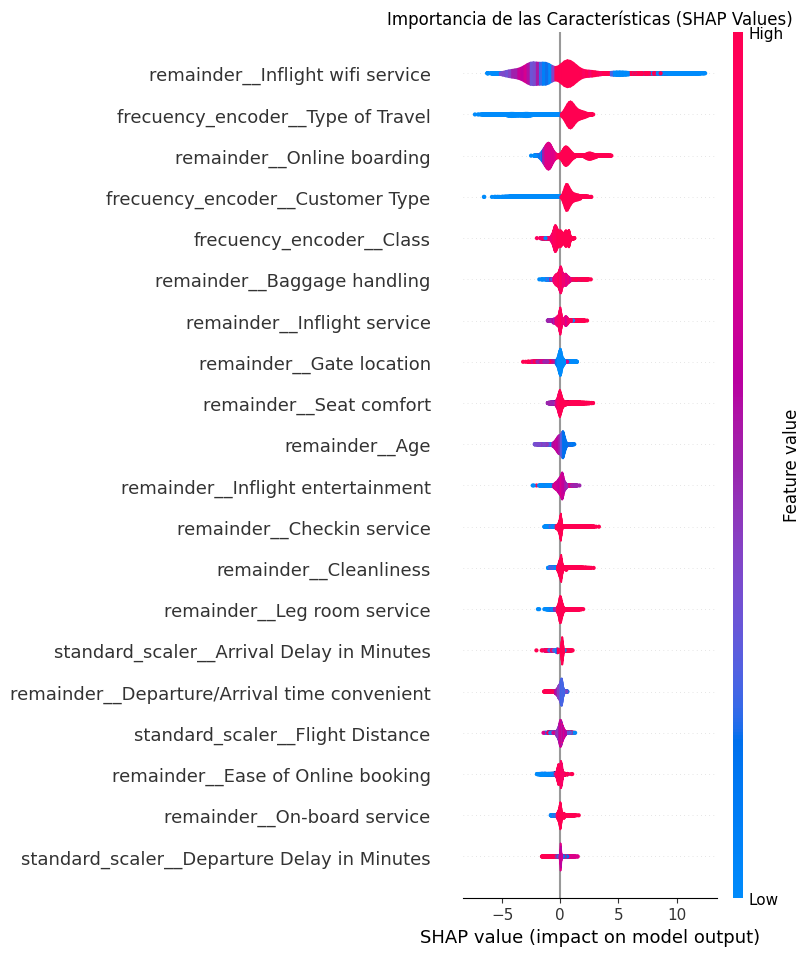

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Inicializar el objeto explainer con el mejor modelo entrenado
explainer = shap.Explainer(best_model)

# Calcular los valores SHAP para el conjunto de validación
shap_values = explainer.shap_values(X_val)

# Resumen global de importancia de las características
shap.summary_plot(shap_values, X_val, plot_type='violin', show=False)
plt.title("Importancia de las Características (SHAP Values)")
plt.show()


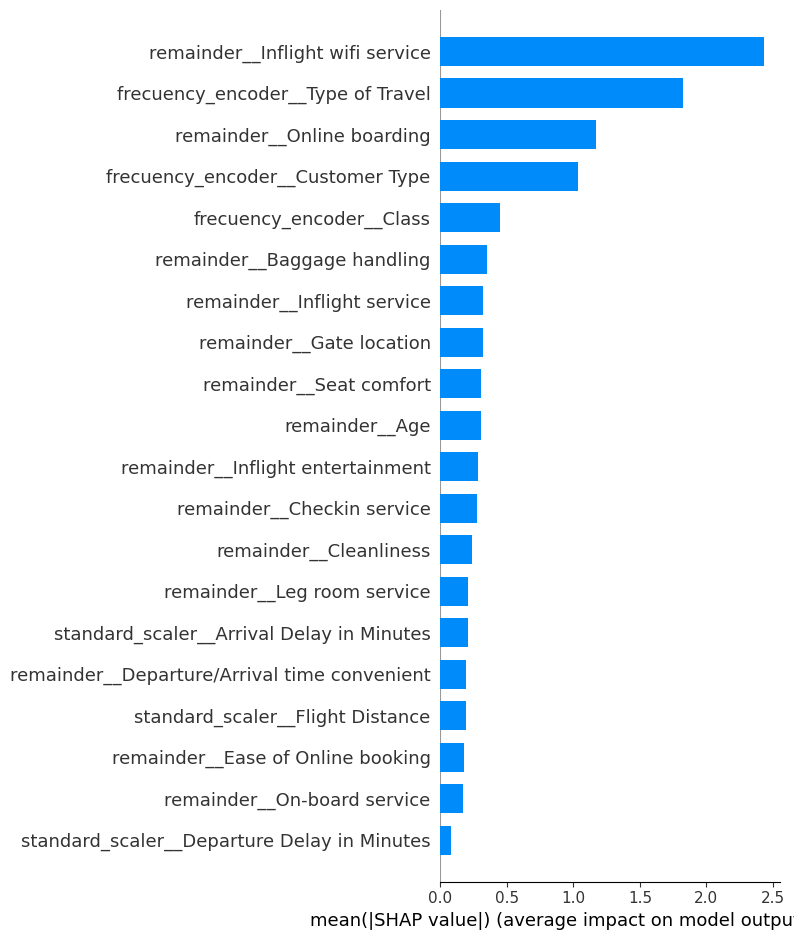

In [ ]:
shap.summary_plot(shap_values, X_val,plot_type='bar')

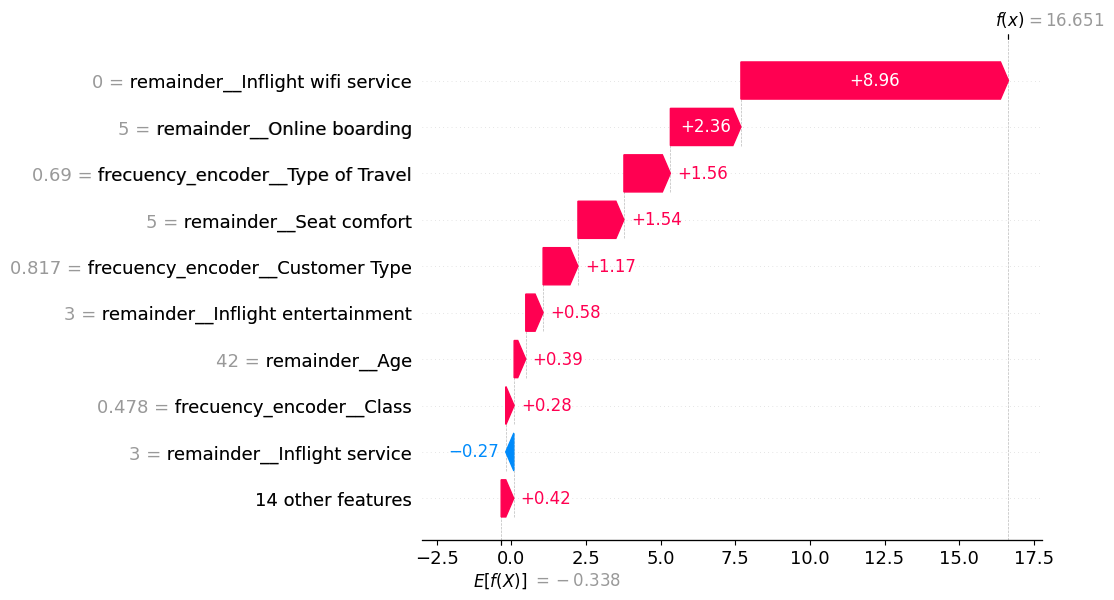

In [ ]:
y_pred_proba=best_model.predict_proba(X_val)[:,1]


shap_values_f = explainer(X_val.loc[X_val.index==y_pred_proba.argmax(),:])
shap.plots.waterfall(shap_values_f[0])